# Chapter 10 - Unsupervised Learning
The topics of this chapter are

- Principal Components Analysis
- Clustering Methods

## Principal Component Analysis
Principal Component Analysis (PCA) is a technique for unsupervised exploratory data analysis. It is used to reduce the dimensions of the observations' space so that the main components, represented as linear combinations of the original predictors, can be represented in a space of lower dimensions. If p is the number of predictors, we can represent the first principal component of the $i$th observation as 

$$z_{i1} = \phi_{11}x_{i1} + \phi_{21}x_{i2} + ... + \phi_{p1}x_{ip}$$

subject to the constraint

$$\sum_{j=1}^p \phi_{j1}^2 = 1$$

The coefficients $\phi_{j1}$ are called loadings. We assume that all variables $x_j$ are standardized so that they have standard deviation one and mean value zero 

$$\bar{x}_j = \frac{1}{n} \sum_{i=1}^n x_{ij} = 0$$

We want the first principal component $z_{1}$ to have the largest variance

$$Var(z_1) = \frac{1}{n} \sum_{i=1}^n (z_{i1} - \bar{z}_1)^2$$

This means that we have to maximize $Var(z_1)$. We can simplify the expression of the variance as follows

$$\bar{z}_1 = \frac{1}{n} \sum_{i=1}^n z_{i1} = \frac{1}{n} \sum_{i=1}^n \sum_{j=1}^p \phi_{j1} x_{ij} = \sum_{j=1}^p \phi_{j1} (\frac{1}{n} \sum_{i=1}^n x_{ij}) = \sum_{j=1}^p \phi_{j1} \bar{x}_j = 0$$

so that 

$$Var(z_1) = \frac{1}{n} \sum_{i=1}^n z_{i1}^2 = \frac{1}{n} \sum_{i=1}^n (\sum_{j=1}^p \phi_{j1} x_{ij})^2$$

and the problem to find the coefficients $\phi_{j1}$ that maximize the variance $Var(z_1)$ becomes

$$\frac{\partial}{\partial \phi_{k1}} Var(z_1) = \frac{2}{n} \sum_{i=1}^n (\sum_{j=1}^p \phi_{j1} x_{ij}) x_{ik} = 0$$

that is a system of p linear equations in $\phi_{j1}$ that can be solved with the [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) technique.  

After we have found the first principal component, we can determine the second principal component as the direction that is orthogonal to the first principal component and that has the highest variance in this subspace, practically repeating the same procedure we have followed to compute the first principal component. A geometric interpretation of the first principal component is that it is the line that is the closest to the n observations. The first two principal components determine the plane that is the closest to the observations, and so forth. We can determine the first M < p principal components that represent the bulk of the variability of our observations. The proportion of variance captured by the $m$th principal component is represented by the ratio 

$$\frac{Var(z_m)}{ \sum_{j=1}^p Var(x_j)}$$


## Clustering Methods
There are two types of clustering methods: K-Means clustering and Hierarchical clustering. In K-Means clustering the number of clusters K must be specified in advance.
We want the distances between observations within each cluster 

$$W(C_k) = \frac{1}{|C_k|} \sum_{i,i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})^2$$

such that

$$\sum_{k=1}^K W(C_k)$$

is minimized. 

### 10.4 Principal Component Analysis
We wil perform PCA on the USArrests data set. The data set contains the number of four types of crimes in each state of the US.

In [14]:
names(USArrests); dim(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

[1] 50  4

In [3]:
apply(USArrests, 2, mean) # applies the mean() function to the columns (margin 2, 1 for rows) of the USArrests data set

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [4]:
apply(USArrests, 2, var) # applies the var() function to compute the variance

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

We use the prcomp() to perform PCA and we set the scale argument to true to standardize the variables' standard deviation such that they have the same relevance. We can see the proportion of the variance captured by each principal component.

In [13]:
pr.out <- prcomp(USArrests, scale = TRUE)
summary(pr.out)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.5749 0.9949 0.59713 0.41645
Proportion of Variance 0.6201 0.2474 0.08914 0.04336
Cumulative Proportion  0.6201 0.8675 0.95664 1.00000

We can also see the loadings of each principal component.

In [12]:
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


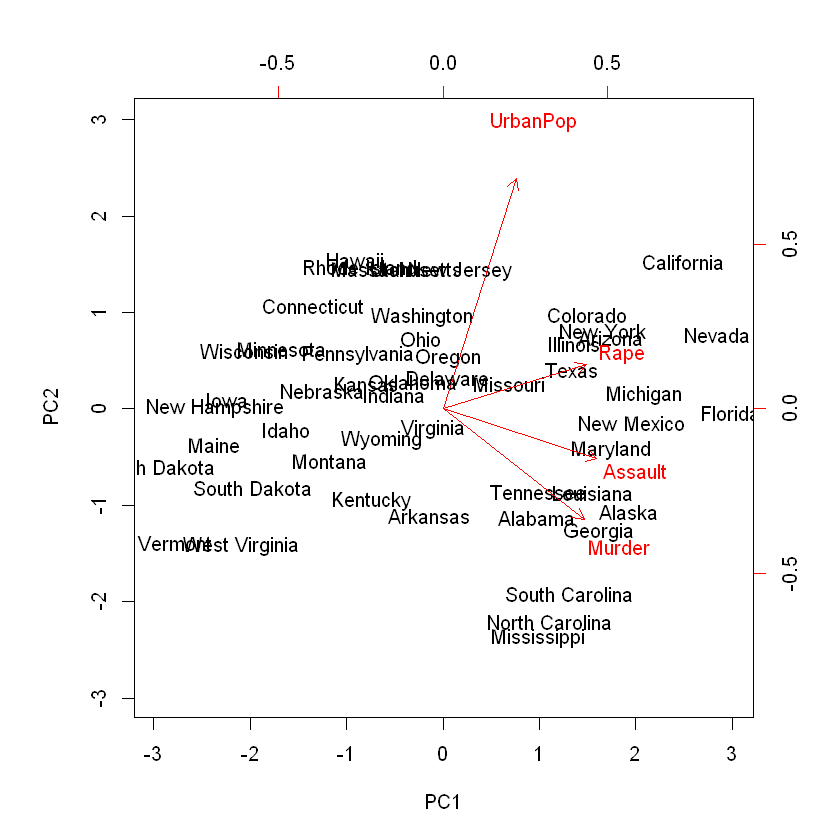

In [16]:
pr.out$rotation <- - pr.out$rotation
pr.out$x <- - pr.out$x
biplot(pr.out, scale = 0)